In [1]:
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d

import xspec as x

import matplotlib
import matplotlib.cm as cm
from matplotlib.gridspec import GridSpec
from scipy import stats

!ls

bkg		    merge_photons.ipynb      spectra_from_photons.ipynb  utils
chandra		    newLogFile.txt	     spectra_magneticum.ipynb
figures		    README.md		     tables
hmf_clusters.ipynb  scaling_relations.ipynb  T_vs_T500_ch.pdf


# AGNs

In [2]:
data_name = "../data/eROSITA_cluster_agn_box2hr/agn_092.dat"
headers1 = ["ID", 
            "x [kpc/h]", 
            "y [kpc/h]", 
            "z[kpc/h]", 
            "M [Msol]", 
            "Mdot [Msol/year]", 
            "Lbol [erg/s]", 
            "Lsoftx [erg/s]", 
            "Lhard [erg/s]", 
            "f_obs"]
table1 = pd.read_csv(data_name, comment='#', header=None, sep='\s+', names=headers1)
table1

,ID,x [kpc/h],y [kpc/h],z[kpc/h],M [Msol],Mdot [Msol/year],Lbol [erg/s],Lsoftx [erg/s],Lhard [erg/s],f_obs
0,0,240134.23000,278604.62,216048.58,39442900.0,0.000095,5.980697e+41,5.099707e+40,7.828258e+40,1.000000
1,1,238934.14000,278966.09,216201.14,132927000.0,0.000101,6.380837e+41,5.418299e+40,8.306542e+40,1.000000
2,2,238487.81000,278987.03,216040.61,79275000.0,0.000214,1.352523e+42,1.086058e+41,1.640156e+41,1.000000
3,3,237887.23000,277908.97,216132.50,67656000.0,0.000628,3.964621e+42,2.871005e+41,4.243506e+41,0.935222
4,4,236814.19000,278410.41,216421.95,101353000.0,0.000999,6.303717e+42,4.331131e+41,6.342556e+41,0.885045
...,...,...,...,...,...,...,...,...,...,...
362237,390241,1199.33250,148509.62,158785.95,137284000.0,0.000207,1.307974e+42,1.053215e+41,1.591622e+41,1.000000
362238,390243,918.27228,147657.55,160155.78,135256000.0,0.000421,2.658653e+42,2.006838e+41,2.990020e+41,0.978924
362239,390244,800.08716,146986.00,160445.52,114989000.0,0.000192,1.212590e+42,9.824784e+40,1.486975e+41,1.000000
362240,390245,9111.28420,152372.50,155277.52,82102500.0,0.000296,1.869630e+42,1.459404e+41,2.189755e+41,1.000000


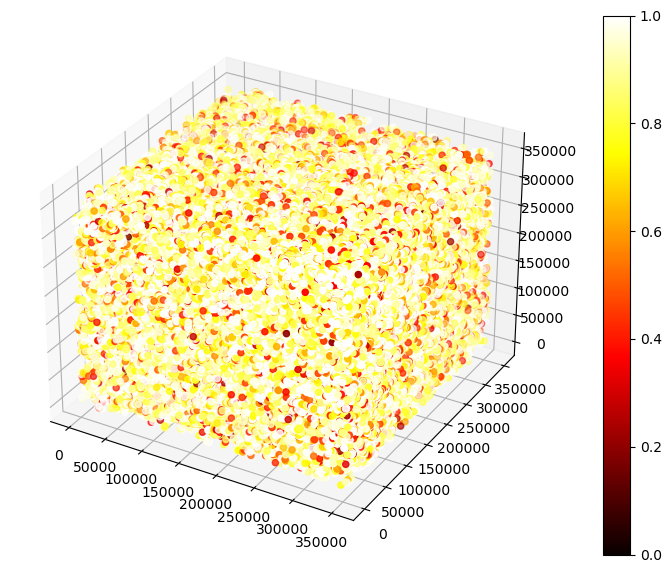

In [3]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table1.to_numpy().astype(float)

x0 = data_table[:,1]
y0 = data_table[:,2]
z0 = data_table[:,3]
c0 = data_table[:,9]

#ax.set_xlabel('X Label')
#ax.set_ylabel('Y Label')
#ax.set_zlabel('Z Label')

img = ax.scatter(x0, y0, z0, c=c0, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# CLUSTERS

In [26]:
data_name = "../data/eROSITA_cluster_agn_box2hr/cluster_092.dat"
headers2 = ["ID",
            "x [kpc/h]", 
            "y [kpc/h]",
            "z[kpc/h]",
            "Mvir [Msol/h]", 
            "M200m [Msol/h]",
            "M500m [Msol/h]", 
            "M200c [Msol/h]", 
            "M500c [Msol/h]", 
            "R500c [kpc/h]",
            "Mgas_500c [Msol/h]",  
            "Mstar_500c [msol/h]", 
            "T_500c [keV]",
            "Lx_500c [1e44 erg/s]"]
  
table2 = pd.read_csv(data_name, comment='#', sep='\\s+', header=None, names=headers2)
table2

,ID,x [kpc/h],y [kpc/h],z[kpc/h],Mvir [Msol/h],M200m [Msol/h],M500m [Msol/h],M200c [Msol/h],M500c [Msol/h],R500c [kpc/h],Mgas_500c [Msol/h],Mstar_500c [msol/h],T_500c [keV],Lx_500c [1e44 erg/s]
0,0,209662.89,204439.160,350198.380,1.291030e+15,1.353640e+15,8.768320e+14,1.066300e+15,6.381420e+14,1317.500,8.039430e+13,1.828060e+13,6.79982,28.828400
1,1,315504.91,24307.531,278968.970,6.596320e+14,6.963740e+14,4.933810e+14,5.734760e+14,3.555280e+14,1084.090,4.279230e+13,1.029420e+13,5.00653,8.318200
2,2,327344.81,231334.050,209859.410,5.868580e+14,6.261910e+14,4.266780e+14,4.803030e+14,3.455940e+14,1073.870,4.230100e+13,8.609530e+12,5.30121,13.241600
3,3,250312.62,124154.620,152601.860,6.100200e+14,6.539930e+14,4.571940e+14,5.200830e+14,3.548280e+14,1083.380,3.800410e+13,1.197950e+13,5.52798,6.703500
4,4,228365.23,251743.360,37959.930,4.529730e+14,4.855830e+14,3.415140e+14,3.900380e+14,2.746690e+14,994.725,2.981750e+13,1.017560e+13,4.79817,5.777400
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
392,633,310383.62,23657.348,52717.359,7.255710e+13,7.624380e+13,5.966020e+13,6.474390e+13,5.082570e+13,566.838,4.502600e+12,1.537580e+12,1.47042,0.306448
393,640,254069.62,323948.190,113528.680,7.916330e+13,8.101860e+13,6.878390e+13,7.459810e+13,5.720840e+13,589.649,5.763540e+12,1.565750e+12,1.50931,0.574427
394,641,282823.16,197597.220,162560.380,8.053650e+13,8.280380e+13,6.744130e+13,7.380510e+13,5.089760e+13,567.110,4.559750e+12,1.361160e+12,1.44538,0.265205
395,653,327764.91,298013.000,295632.530,8.146270e+13,8.457510e+13,6.641930e+13,7.345440e+13,5.436640e+13,579.707,4.288360e+12,1.692740e+12,1.68373,0.272670


In [50]:
#tyt = table2[table2["M500c [Msol/h]"]<1.4e+14]
#display(tyt)
#tyt[tyt["M500c [Msol/h]"]>1.3e+14]

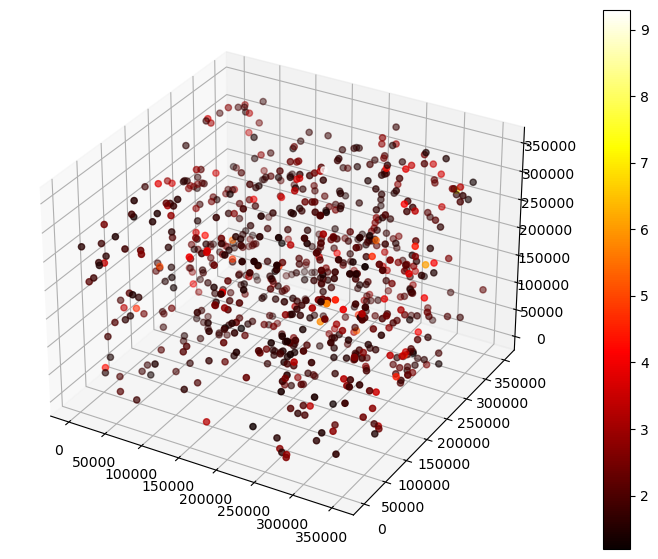

In [6]:
#plt.rcParams["figure.figsize"] = [14.00, 7.00]
#plt.rcParams["figure.autolayout"] = True
fig = plt.figure(figsize = (14,7))
ax = fig.add_subplot(111, projection='3d')

data_table = table2.to_numpy().astype(float)

x1 = data_table[:,1]
y1 = data_table[:,2]
z1 = data_table[:,3]
c1 = data_table[:,12]

img = ax.scatter(x1, y1, z1, c=c1, cmap=plt.hot())
fig.colorbar(img)
plt.show()

# SCALING RELATIONS

Let's check whether parameters of these clusters satisfy scaling relations from Churazov et al. (2015):

z = 0.1011429

<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:29: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
<>:20: SyntaxWarning: invalid escape sequence '\o'
<>:29: SyntaxWarning: invalid escape sequence '\o'
<>:39: SyntaxWarning: invalid escape sequence '\o'
/tmp/ipykernel_2070693/799047571.py:20: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
/tmp/ipykernel_2070693/799047571.py:29: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
/tmp/ipykernel_2070693/799047571.py:39: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$M_{500}, M_{\odot}$", fontsize=15)


<Figure size 640x480 with 0 Axes>

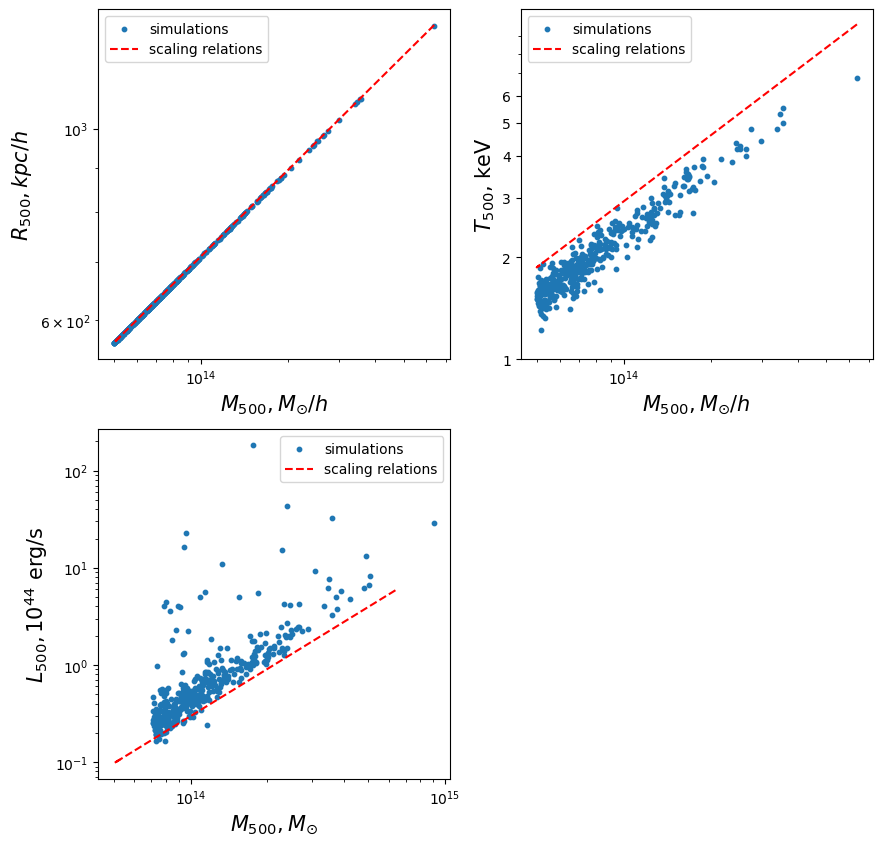

In [28]:
%run -i 'utils/functions.py'

plt.figure(figsize=(10, 10))

M500s = table2["M500c [Msol/h]"]
R500s = table2["R500c [kpc/h]"]
T500s = table2["T_500c [keV]"]
L500s = table2["Lx_500c [1e44 erg/s]"]

zzz = [0.5181775]*len(M500s)
R500s_rel = R500(M500s, zzz)
T500s_rel = T_X(M500s, zzz)
L500s_rel = L_X(M500s, zzz, 0.704)

plt.subplot(221)
plt.scatter(M500s, R500s, s=10, label = 'simulations')
plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$R_{500}, kpc/h$", fontsize=15)
plt.legend()

plt.subplot(222)
plt.scatter(M500s, T500s, s=10, label = 'simulations')
plt.plot(M500s, T500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.yticks([1,2,3,4,5,6], [1,2,3,4,5,6])
plt.legend()

plt.subplot(223)
plt.scatter(M500s/0.704, L500s, s=10, label = 'simulations')
plt.plot(M500s, L500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}, M_{\odot}$", fontsize=15)
plt.ylabel("$L_{500}, 10^{44}$ erg/s", fontsize=15)
plt.legend()

plt.show()

<>:30: SyntaxWarning: invalid escape sequence '\o'
<>:31: SyntaxWarning: invalid escape sequence '\c'
<>:30: SyntaxWarning: invalid escape sequence '\o'
<>:31: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_891373/820091230.py:30: SyntaxWarning: invalid escape sequence '\o'
  plt.xlabel("$M_{500}$ from catalogue, $M_{\odot}/h$", fontsize=12)
/tmp/ipykernel_891373/820091230.py:31: SyntaxWarning: invalid escape sequence '\c'
  plt.ylabel("$500 \\rho_{crit}(0) \cdot E^2(z) \cdot \\frac{4}{3} \pi R_{500}^3 \ / \ (1+z)^3$, $M_{\odot}/h$", fontsize=12)


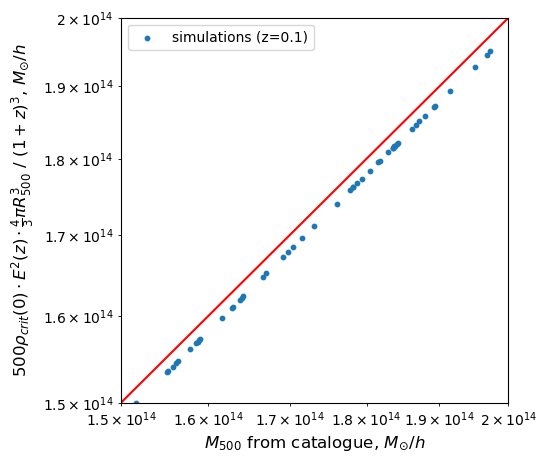

In [3]:
%run -i 'utils/functions.py'

from astropy.cosmology import FlatLambdaCDM
rho_0 = FlatLambdaCDM(H0=100*0.704, Om0=0.272).critical_density(0) # g/cm^3
rho_0 = rho_0.value / 2e33 * (3.08e21)**3
h = 0.704

plt.figure(figsize=(5, 5))

M500s = table2["M500c [Msol/h]"]
R500s = table2["R500c [kpc/h]"]
T500s = table2["T_500c [keV]"]
L500s = table2["Lx_500c [1e44 erg/s]"]

zzz = np.array([0.1011429]*len(M500s))
Es = np.sqrt(0.272*(1+zzz)**3+0.728)

R500s_rel = R500(M500s, zzz)
T500s_rel = T_X(M500s, zzz)
L500s_rel = L_X(M500s, zzz, 0.704)

m5 = 4/3*np.pi * (R500s/h)**3 * 500 * rho_0 * Es**2 / (1+zzz)**3

plt.subplot(111)
plt.scatter(M500s, m5*h, s=10, label = 'simulations (z=0.1)')
#plt.plot(M500s, R500s_rel, color='red', linestyle='--', label = 'scaling relations')
plt.plot([5e13, 1.5e15], [5e13, 1.5e15], color='r')
plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500}$ from catalogue, $M_{\odot}/h$", fontsize=12)
plt.ylabel("$500 \\rho_{crit}(0) \cdot E^2(z) \cdot \\frac{4}{3} \pi R_{500}^3 \ / \ (1+z)^3$, $M_{\odot}/h$", fontsize=12)
plt.legend()

plt.xlim(1.5*10**14, 2*10**14)
plt.ylim(1.5*10**14, 2*10**14)

plt.show()

# ... and from 5x5 field adjusted for different $z$:

In [18]:
spisok0 = pd.read_csv("../data/eROSITA_5.0x5.0/Catalouges/cluster.dat", sep='\s+')
spisok1 = spisok0[spisok0["M500"]>1e13]
#spisok2 = spisok1[spisok1["z_true"]>0.066]
#spisok = spisok2[spisok2["z_true"]<1.75]
#spisok
len(spisok1)

7607

In [19]:
max(spisok1["z_true"])

2.1538295

In [10]:
#spisok.sort_values("M500", inplace=True)
spisok.sort_values("M500", inplace=False)
spisok

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
55915,8,0.477773,0.905290,0.152051,0.007891,2.260120e+14,0.881625,0.881279,1.592210e+14,898.173,5.779340e+12,1.714970e+13,3.80963,8.705920,0.000009,2.110860e+14,1339.20,0
59465,25,0.507521,0.545246,0.268085,0.007974,2.014060e+14,0.828964,0.829204,1.202700e+14,810.418,3.673890e+12,1.262370e+13,3.09033,3.432240,0.000006,1.899640e+14,1280.94,0
60278,56,0.940982,0.330081,0.510556,0.007392,1.604510e+14,0.843258,0.842559,1.029880e+14,769.577,3.957450e+12,1.033180e+13,2.96683,13.207400,0.000006,1.442230e+14,1168.57,0
60679,1,0.889274,0.210127,0.633906,0.010892,5.133600e+14,0.850574,0.850093,3.055520e+14,1105.840,9.900450e+12,3.168630e+13,4.72281,6.564810,0.000013,4.745990e+14,1738.12,0
61946,65,0.625054,0.409478,0.057728,0.007736,1.574460e+14,0.759249,0.758559,1.042120e+14,764.938,4.066400e+12,1.055240e+13,3.07166,22.488900,0.000006,1.445440e+14,1157.84,0
62308,1,0.569552,0.283180,0.180889,0.011669,5.403810e+14,0.766220,0.765866,3.641040e+14,1160.770,1.071910e+13,3.946750e+13,5.76753,14.299200,0.000017,5.029460e+14,1754.47,0
62969,23,0.869501,0.594314,0.392228,0.008305,1.947960e+14,0.778245,0.778153,1.365710e+14,837.088,6.109920e+12,1.216420e+13,3.31890,1.734020,0.000006,1.821550e+14,1250.58,0
63559,17,0.297899,0.714803,0.590043,0.008942,2.431550e+14,0.789576,0.789184,1.585800e+14,879.858,5.939130e+12,1.681120e+13,3.48448,2.904620,0.000008,2.235460e+14,1338.97,0
64222,62,0.903609,0.006148,0.843746,0.007781,1.602200e+14,0.804217,0.805013,1.022800e+14,760.193,3.739180e+12,1.010730e+13,2.48060,1.388850,0.000004,1.434420e+14,1154.89,0
64564,10,0.775554,0.603950,0.962853,0.009344,2.774520e+14,0.811133,0.810773,1.943820e+14,941.606,6.366700e+12,2.044320e+13,4.08521,12.560500,0.000010,2.545480e+14,1398.18,0


In [11]:
np.mean(T500s), np.mean(M500s)/10**14

(2.122826657754011, 1.0068654344919785)

<Figure size 640x480 with 0 Axes>

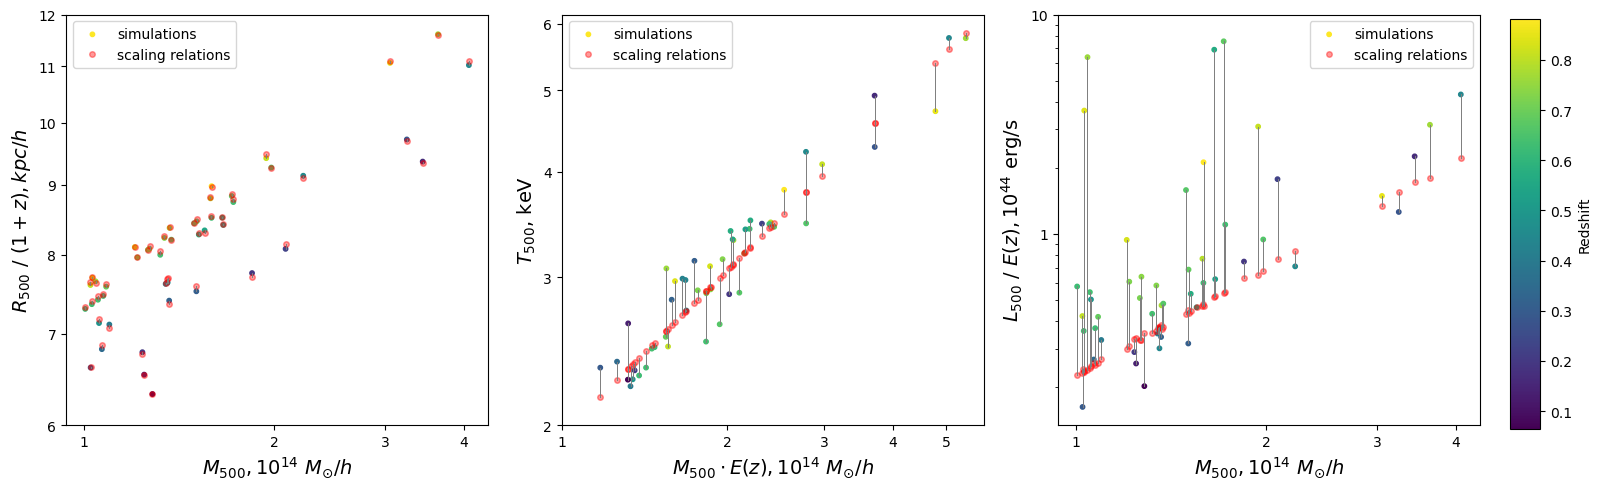

In [12]:
%run -i 'utils/functions.py'

M500s = spisok["M500"].values
R500s = spisok["R500"].values
T500s = spisok["T500"].values
L500s = spisok["Lx500"].values
zs = spisok["z_true"].values

L500s_05_20 = np.zeros(len(M500s))
for i in range(len(M500s)):
    L500s_05_20[i] = L_X_from_T(T500s[i], 0.3, zs[i], L500s[i])

R500s_rel = R500(M500s, zs)
T500s_rel = T_X(M500s, zs)
L500s_rel = L_X(M500s, zs, 0.704)

plt.figure(figsize=(15, 5))

plt.subplot(131, aspect='auto')
draw_panel(M500s, R500s, R500s_rel)
plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$R_{500} \ / \ (1+z), kpc/h$", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
plt.yticks([g*100 for g in [6,7,8,9,10,11,12]], [6,7,8,9,10,11,12])

plt.subplot(132, aspect='auto')
draw_panel(M500s*E(zs), T500s, T500s_rel)
plt.xlabel("$M_{500} \cdot E(z), 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$T_{500}$, keV", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
plt.yticks([2,3,4,5,6], [2,3,4,5,6])
#T500s_rel2 = T_X(M500s, zs, mean_T=3.18, mean_M=1.6)
#plt.plot(M500s*E(zs), T500s_rel2, color='dodgerblue', linewidth=0, marker='o', markersize=4, 
#         alpha=0.4, linestyle='--', label = 'sc.rel. w/ different <M> and <T>')
#plt.legend()

plt.subplot(133, aspect='auto')
#draw_panel(M500s, L500s, L0520s_rel)
draw_panel(M500s, L500s_05_20/E(zs), L500s_rel/E(zs))
plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$L_{500} \ / \ E(z), 10^{44}$ erg/s", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
plt.yticks([1, 10], [1, 10])

#plt.subplots_adjust(right=0.96)
plt.tight_layout()
plt.colorbar(cax = plt.axes([1.01, 0.13, 0.02, 0.82]), label='Redshift')

plt.savefig('figures/sc_rel.png', format='png')
plt.show()

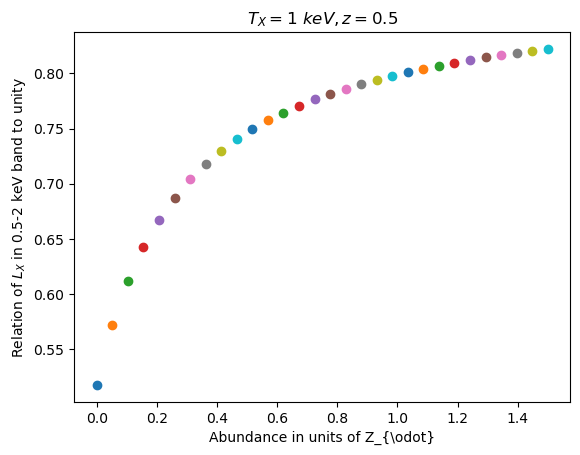

In [13]:
%run -i 'utils/functions.py'

for abunds in np.linspace(0, 1.5, 30):
    plt.scatter(abunds, L_X_from_T(1, abunds, 0.5, 1))
    
plt.title("$T_X = 1 \ keV, z = 0.5$")
plt.xlabel("Abundance in units of Z_{\odot}")
plt.ylabel("Relation of $L_X$ in 0.5-2 keV band to unity")

plt.show()

# 30x30 deg$^2$ field

In [2]:
clusters = pd.read_csv("../data/eROSITA_30.0x30.0/Catalouges/cluster.dat", sep='\\s+', header=0)
clusters = clusters[clusters["M500"]>1e14]
clusters = clusters[clusters["flag"]==0]
clusters

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
171,110,0.970969,0.479718,0.014316,0.004703,2.432930e+14,0.157249,0.157891,1.366960e+14,688.128,4.470500e+12,1.209540e+13,2.44633,0.707698,0.000003,2.049620e+14,1068.920,0
187,163,0.388924,0.570999,0.016006,0.004675,2.390080e+14,0.157312,0.159659,1.126680e+14,645.187,2.896080e+12,1.061830e+13,2.43074,0.532571,0.000003,2.049290e+14,1068.880,0
350,77,0.380183,0.570491,0.033800,0.005197,3.282700e+14,0.157977,0.157810,1.925340e+14,771.351,5.156740e+12,2.121000e+13,3.21771,1.515690,0.000005,2.887220e+14,1198.270,0
820,68,0.735543,0.863489,0.086085,0.005228,3.341870e+14,0.159935,0.160192,1.800240e+14,754.271,6.340420e+12,1.596800e+13,3.57076,0.972861,0.000004,2.724390e+14,1175.290,0
1245,111,0.804864,0.355207,0.133510,0.004668,2.379170e+14,0.161713,0.161111,1.321030e+14,680.349,4.667490e+12,9.869480e+12,2.78095,0.452088,0.000003,1.944720e+14,1050.360,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18589,113,0.839159,0.495644,0.394607,0.011199,2.242680e+14,0.063945,0.063977,1.184480e+14,615.838,2.883010e+12,1.160680e+13,2.22808,0.537683,0.000002,1.889120e+14,976.536,0
18610,199,0.149218,0.307198,0.406194,0.011455,2.400200e+14,0.064342,0.064928,1.282700e+14,632.408,3.427130e+12,1.130680e+13,2.26553,0.455429,0.000002,1.935300e+14,984.440,0
19523,349,0.373303,0.943536,0.987909,0.010375,1.783400e+14,0.084342,0.084015,1.055570e+14,592.650,3.313370e+12,6.942770e+12,2.39539,0.231120,0.000002,1.464050e+14,897.005,0
19771,323,0.759637,0.387809,0.508332,0.020783,1.912580e+14,0.034099,0.033707,1.272360e+14,616.706,3.593030e+12,1.067760e+13,2.61661,0.651073,0.000003,1.638830e+14,910.698,0


In [3]:
pd.set_option('display.max_rows', None)

In [4]:
clusters.sort_values("M500", inplace=True)
#clusters.sort_values("M500", inplace=False)
clusters

,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
7996,52,0.701214,0.864952,0.889731,0.004550,2.202970e+14,0.190263,0.189216,1.005210e+14,621.117,3.705870e+12,8.710240e+12,2.10168,0.452289,0.000002,1.539950e+14,971.786,0
1838,325,0.515507,0.942247,0.197297,0.004156,1.678390e+14,0.164107,0.164652,1.011360e+14,622.376,3.063870e+12,7.834560e+12,2.21686,0.362044,0.000002,1.447890e+14,952.021,0
15138,197,0.844231,0.344865,0.130662,0.007679,2.369120e+14,0.089352,0.089028,1.017760e+14,598.370,2.722430e+12,9.687380e+12,2.16950,0.420183,0.000002,1.901940e+14,1000.300,0
9636,440,0.052106,0.731626,0.114272,0.004940,1.466080e+14,0.124305,0.123266,1.022460e+14,612.042,2.397400e+12,9.998630e+12,1.88489,0.691902,0.000002,1.309260e+14,902.006,0
16666,243,0.119109,0.861178,0.613586,0.007301,2.036360e+14,0.106413,0.104950,1.038220e+14,602.344,2.728240e+12,1.056430e+13,2.32066,0.574152,0.000003,1.659020e+14,955.775,0
13751,216,0.538344,0.011388,0.848694,0.005370,1.882820e+14,0.151141,0.149367,1.040470e+14,615.620,3.381080e+12,7.849840e+12,2.33016,0.334131,0.000002,1.530120e+14,950.177,0
18073,181,0.959639,0.008418,0.054840,0.011297,2.301980e+14,0.052345,0.053057,1.042280e+14,590.152,3.227960e+12,9.047630e+12,2.11130,0.465276,0.000002,1.692570e+14,941.464,0
6001,335,0.541685,0.516097,0.661021,0.004080,1.588200e+14,0.181587,0.180465,1.044550e+14,629.103,3.088000e+12,9.186480e+12,2.45782,0.674680,0.000003,1.375240e+14,935.803,0
8930,130,0.515599,0.804422,0.996967,0.004482,2.106110e+14,0.194345,0.193937,1.049980e+14,630.187,3.454830e+12,9.908290e+12,2.28748,0.573800,0.000003,1.614220e+14,987.133,0
14559,271,0.748497,0.452910,0.992172,0.005125,1.636930e+14,0.156425,0.157270,1.052060e+14,617.893,4.226760e+12,1.031790e+13,2.16353,17.932400,0.000002,1.429120e+14,928.774,0


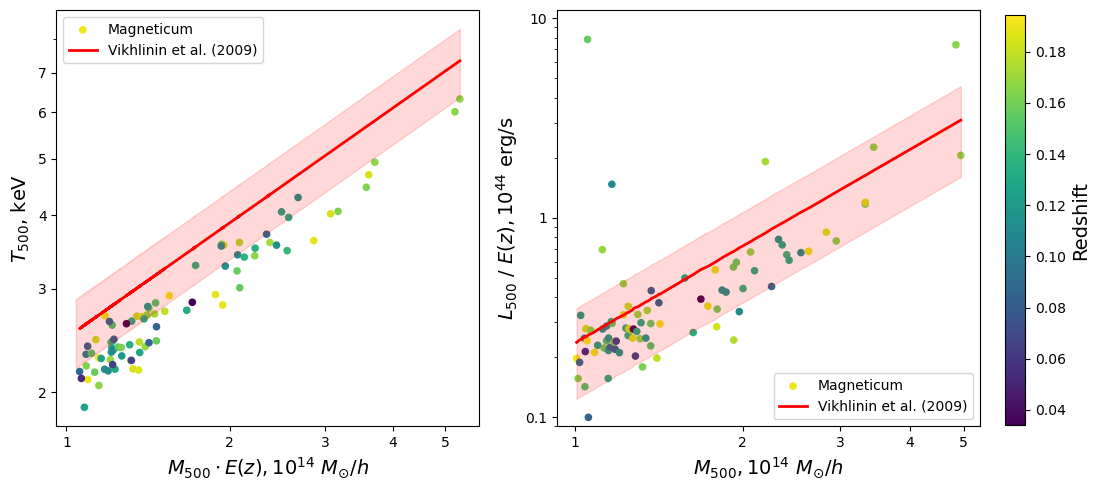

In [5]:
%run -i 'utils/functions.py'

M500s = clusters["M500"].values
R500s = clusters["R500"].values
T500s = clusters["T500"].values
L500s = clusters["Lx500"].values
zs = clusters["z_true"].values

L500s_05_20 = np.zeros(len(M500s))
for i in range(len(M500s)):
    L500s_05_20[i] = L_X_from_T(T500s[i], 0.3, zs[i], L500s[i])

R500s_rel = R500(M500s, zs)
T500s_rel = T_X(M500s, zs)
L500s_rel = L_X(M500s, zs, 0.704)

plt.figure(figsize=(10, 5))

#plt.subplot(131, aspect='auto')
#draw_panel(M500s, R500s, R500s_rel)
#plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
#plt.ylabel("$R_{500} \ / \ (1+z), kpc/h$", fontsize=14)
#plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
#plt.yticks([g*100 for g in [6,7,8,9,10,11,12]], [6,7,8,9,10,11,12])

plt.subplot(121, aspect='auto')
draw_panel(M500s*E(zs), T500s, T500s_rel)
plt.xlabel("$M_{500} \\cdot E(z), 10^{14} \\ M_{\\odot}/h$", fontsize=14)
plt.ylabel("$T_{500}$, keV", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
plt.yticks([2,3,4,5,6,7], [2,3,4,5,6,7])
#T500s_rel2 = T_X(M500s, zs, mean_T=3.18, mean_M=1.6)
#plt.plot(M500s*E(zs), T500s_rel2, color='dodgerblue', linewidth=0, marker='o', markersize=4, 
#         alpha=0.4, linestyle='--', label = 'sc.rel. w/ different <M> and <T>')
#plt.legend()
TX = [6.81, 3.99, 3.43, 4.12, 6.33, 8.73, 6.45, 8.22, 7.96, 6.14, 4.88]
MT = [6.61, 2.92, 2.32, 3.07, 6.74, 11.05, 6.03, 8.66, 8.20, 5.58, 4.54]
zw = [0.0386, 0.0304, 0.0346, 0.0328, 0.0557, 0.0542, 0.0557, 0.0779, 0.0881, 0.0622, 0.0469]
LX = [2.37, 1.27, 1.60, 1.23, 3.14, 2.78, 2.91, 5.72, 7.24, 3.52, 1.96, 7.20]

#plt.scatter(np.array(MT)*10**14, TX)
#plt.plot(np.array(MT)*10**14, T_X(np.array(MT)*10**14, zw), color='k', label='$5 \cdot (\\frac{M}{2.95 \cdot 10^{14} / h})^{0.65} * ( E(z) )^{0.65}$')

fix = np.append([1.04e14], M500s*E(zs))

plt.fill_between(fix, 
                 5 * (fix/0.704/(2.95)/10**14*0.704)**(0.65)*(1+0.2*2/3) ,#* E(zs)**(0.65), 
                 5 * (fix/0.704/(2.95)/10**14*0.704)**(0.65)*(1-0.2*2/3) ,#* E(zs)**(0.65), 
                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")
plt.legend()
    
plt.subplot(122, aspect='auto')
#draw_panel(M500s, L500s, L0520s_rel)
draw_panel(M500s, L500s_05_20/E(zs), L500s_rel/E(zs))
plt.xlabel("$M_{500}, 10^{14} \\ M_{\\odot}/h$", fontsize=14)
plt.ylabel("$L_{500} \\ / \\ E(z), 10^{44}$ erg/s", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
plt.yticks([0.1, 1., 10], [0.1,1, 10])
plt.ylim(0.09, 11)

plt.fill_between(M500s, 
                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*0.52, 
                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*1.48, 
                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")
plt.legend()

#plt.subplots_adjust(right=0.96)
plt.tight_layout()
plt.colorbar(cax = plt.axes([1.01, 0.14, 0.02, 0.82])).set_label('Redshift', fontsize=14)

#plt.savefig('figures/sc_rel_new.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [6]:
np.mean(T500s), np.mean(M500s)/10**14

(2.9167704761904765, 1.6378555952380953)

#### Vikhlinin - check

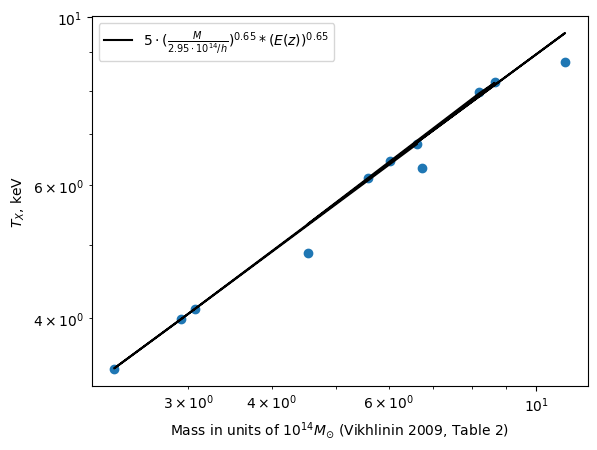

In [6]:
%run -i 'utils/functions.py'

TX = [6.81, 3.99, 3.43, 4.12, 6.33, 8.73, 6.45, 8.22, 7.96, 6.14, 4.88]
MT = [6.61, 2.92, 2.32, 3.07, 6.74, 11.05, 6.03, 8.66, 8.20, 5.58, 4.54]
zw = [0.0386, 0.0304, 0.0346, 0.0328, 0.0557, 0.0542, 0.0557, 0.0779, 0.0881, 0.0622, 0.0469] 

plt.scatter(MT, TX)
plt.plot(MT, T_X(np.array(MT)*10**14, zw), color='k', label='$5 \cdot (\\frac{M}{2.95 \cdot 10^{14} / h})^{0.65} * ( E(z) )^{0.65}$')
plt.xlabel("Mass in units of $10^{14} M_{\odot}$ (Vikhlinin 2009, Table 2)")
plt.ylabel("$T_X$, keV")
plt.xscale("log")
plt.yscale("log")
plt.legend()
plt.show()

## New figures

<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:64: SyntaxWarning: invalid escape sequence '\c'
<>:117: SyntaxWarning: invalid escape sequence '\c'
<>:61: SyntaxWarning: invalid escape sequence '\c'
<>:64: SyntaxWarning: invalid escape sequence '\c'
<>:117: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_891373/1888021519.py:61: SyntaxWarning: invalid escape sequence '\c'
  color='k', label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot}/ h})^{0.65}$')
/tmp/ipykernel_891373/1888021519.py:64: SyntaxWarning: invalid escape sequence '\c'
  label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot} \ \ })^{0.65}$',
/tmp/ipykernel_891373/1888021519.py:117: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$M_{500} \cdot E(z), 10^{14} \ M_{\odot}/h$", fontsize=15)


(1.290872123811873, 10.456625136961339)
(62187734898281.35, 894057567136091.5)
5.0 0.4046724661756541


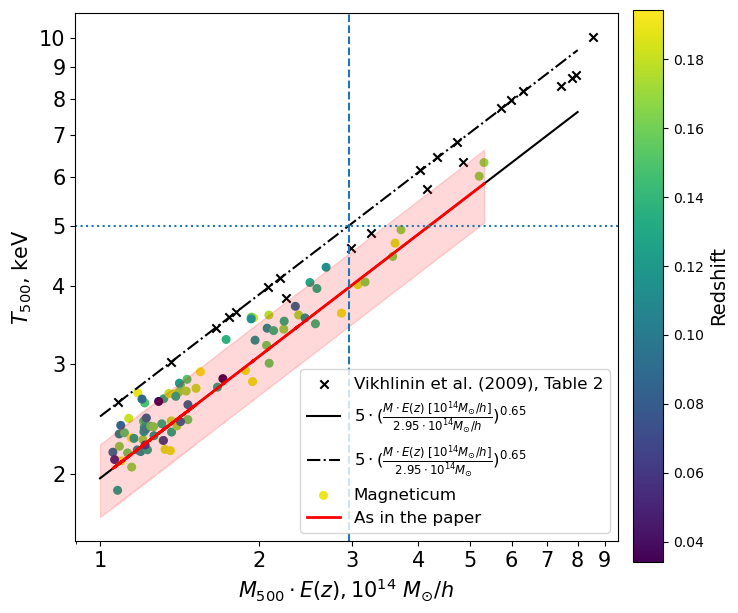

In [14]:
def T_X(MM500):

    # in keV if M500 in M_sol/h
    
    ts = 5 * (MM500/ (2.95*10**14/0.704))**(0.65) # * E(zz[i])**(0.65) 
    yy = 5 * (MM500/ (2.95*10**14      ))**(0.65) # * E(zz[i])**(0.65) 

    return ts, yy

h=0.704

M500s = clusters["M500"].values
R500s = clusters["R500"].values
T500s = clusters["T500"].values
L500s = clusters["Lx500"].values
zs = clusters["z_true"].values

#print(M500s)
#L500s_05_20 = np.zeros(len(M500s))
#for i in range(len(M500s)):
#    L500s_05_20[i] = L_X_from_T(T500s[i], 0.1, zs[i], L500s[i])

R500s_rel = R500(M500s, zs)

T500s_rel = T_X(M500s*E(zs))[0]
#L500s_rel = L_X(M500s, zs, 0.704)

plt.figure(figsize=(6, 6))

#plt.subplot(131, aspect='auto')
#draw_panel(M500s, R500s, R500s_rel)
#plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
#plt.ylabel("$R_{500} \ / \ (1+z), kpc/h$", fontsize=14)
#plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
#plt.yticks([g*100 for g in [6,7,8,9,10,11,12]], [6,7,8,9,10,11,12])

plt.subplot(111, aspect='auto')

#draw_panel(M500s*E(zs), T500s, T500s_rel)

#T500s_rel2 = T_X(M500s, zs, mean_T=3.18, mean_M=1.6)
#plt.plot(M500s*E(zs), T500s_rel2, color='dodgerblue', linewidth=0, marker='o', markersize=4, 
#         alpha=0.4, linestyle='--', label = 'sc.rel. w/ different <M> and <T>')
#plt.legend()

TX = [6.81, 3.99, 3.43, 4.12, 6.33, 8.73, 6.45, 8.22, 7.96, 6.14, 4.88,
      10.04, 8.37, 2.61, 3.83, 8.63, 7.72, 3.03, 3.64, 5.72, 3.57, 4.61]
MT = [6.61, 2.92, 2.32, 3.07, 6.74, 11.05, 6.03, 8.66, 8.20, 5.58, 4.54,
      11.70, 10.33, 1.52, 3.15, 10.82, 7.88, 1.91, 2.51, 5.80, 2.46, 4.16]
zw = [0.0386, 0.0304, 0.0346, 0.0328, 0.0557, 0.0542, 0.0557, 0.0779, 0.0881, 0.0622, 0.0469,
      0.0904, 0.0581, 0.0288, 0.0355, 0.0602, 0.0743, 0.0345, 0.0549, 0.0445, 0.0342, 0.0475]
LX = [2.37, 1.27, 1.60, 1.23, 3.14, 2.78, 2.91, 5.72, 7.24, 3.52, 1.96,
      7.20, 2.66, 6.18, 9.40, 2.69, 3.90, 7.47, 1.93, 1.06, 5.98, 1.14]

plt.scatter(np.array(MT)*E(np.array(zw))*0.704*10**14, TX, color='k', label="Vikhlinin et al. (2009), Table 2", marker='x')

#plt.plot(   np.array(MT)*E(np.array(zw))*0.704*10**14, T_X(np.array(MT)*E(np.array(zw))*0.704*10**14), 
#            color='k', label='$5 \cdot (\\frac{M \cdot E(z)}{2.95 \cdot 10^{14} M_{\odot}/ h})^{0.65}$')

plt.plot(   [1e14, 8e14], [T_X(1e14)[0], T_X(8e14)[0]], 
            color='k', label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot}/ h})^{0.65}$')
plt.plot(   [1e14, 8e14], [T_X(1e14)[1], T_X(8e14)[1]], 
            color='k', 
            label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot} \ \ })^{0.65}$',
            ls = '-.')



fix = np.append([1e14], M500s*E(zs))

plt.scatter(M500s*E(zs), T500s, c=zs, cmap='viridis', s=30, label = 'Magneticum')

plt.plot(M500s*E(zs), T500s_rel, color='red', linewidth=2, marker='.', markersize=0, 
         alpha=1, linestyle='-', label = 'As in the paper')

plt.fill_between(fix, 
                 5 * (fix/(2.95)/10**14*h)**(0.65)*(1+0.2*2/3) ,#* E(zs)**(0.65), 
                 5 * (fix/(2.95)/10**14*h)**(0.65)*(1-0.2*2/3) ,#* E(zs)**(0.65), 
                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")

px, py = plt.gca().get_xlim(), plt.gca().get_ylim()

print(py)
print(px)

ymm = (T_X(2.95*10**14)[1]-py[0])/(py[1]-py[0])

print(T_X(2.95*10**14)[1], ymm)

plt.axvline(2.95*10**14, ls='--', ymin=0, ymax=1)

plt.axhline(5, ls=':', xmax=1)


plt.legend(fontsize=12, loc=4)
    
#plt.subplot(122, aspect='auto')
##draw_panel(M500s, L500s, L0520s_rel)
#draw_panel(M500s, L500s_05_20/E(zs), L500s_rel/E(zs))
#plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
#plt.ylabel("$L_{500} \ / \ E(z), 10^{44}$ erg/s", fontsize=14)
#plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
#plt.yticks([0.1, 1., 10], [0.1,1, 10])
#plt.ylim(0.09, 11)

#plt.fill_between(M500s, 
#                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*0.52, 
#                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*1.48, 
#                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")
#plt.legend()

#plt.subplots_adjust(right=0.96)
plt.tight_layout()

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500} \cdot E(z), 10^{14} \ M_{\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5, 6, 7, 8, 9]], [1, 2, 3, 4, 5, 6, 7, 8, 9], size=15)
plt.yticks([2,3,4,5,6,7,8,9,10], [2,3,4,5,6,7,8,9,10], size=15)

normzs = matplotlib.colors.Normalize(vmin=min(zs), vmax=max(zs), clip=True)
mapperzs = cm.ScalarMappable(norm=normzs, cmap='viridis')
#zs_colour = np.array([(mapperzs.to_rgba(v)) for v in zs])
plt.colorbar(mappable=mapperzs, cax = plt.axes([1.0, 0.06, 0.05, 0.92])).set_label('Redshift', fontsize=14)

#plt.savefig('sc-rel.pdf', format='pdf', bbox_inches='tight')
plt.show()

<Figure size 640x480 with 0 Axes>

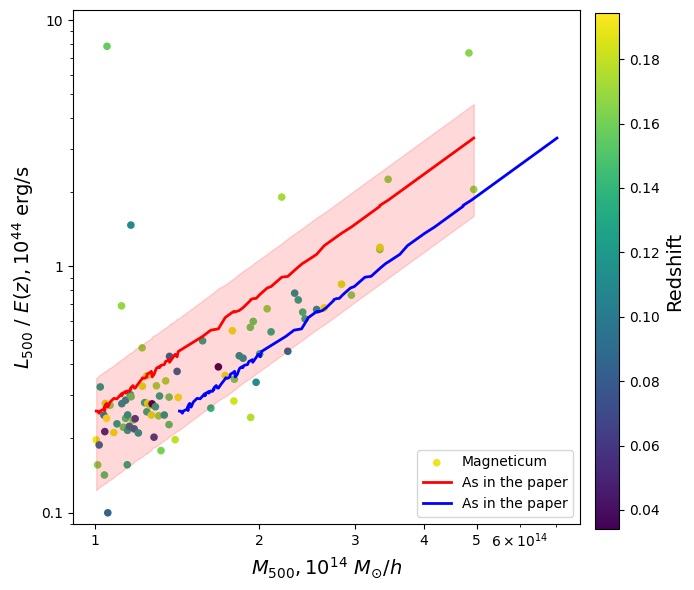

In [71]:
%run -i 'utils/functions.py'

plt.figure(figsize=(6, 6))

plt.subplot(111, aspect='auto')

plt.scatter(M500s, L500s_05_20/E(zs), c=zs, cmap='viridis', s=20, label = 'Magneticum')

plt.plot(M500s, L500s_rel/E(zs), color='red', linewidth=2, marker='.', markersize=0, 
         alpha=1, linestyle='-', label = 'As in the paper')

plt.plot(M500s/0.704, L500s_rel/E(zs), color='blue', linewidth=2, marker='.', markersize=0, 
         alpha=1, linestyle='-', label = 'As in the paper')

#plt.plot(np.append(M500s, 9e14), L500s_rel/E(zs), color='k', linewidth=2, marker='.', markersize=0, 
#         alpha=1, linestyle='-', label = 'Fit from Viklinin+2009')

plt.xscale("log")
plt.yscale("log")

plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
plt.ylabel("$L_{500} \ / \ E(z), 10^{44}$ erg/s", fontsize=14)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
plt.yticks([0.1, 1., 10], [0.1,1, 10])
plt.ylim(0.09, 11)

plt.fill_between(M500s, 
                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*0.52, 
                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*1.48, 
                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")

#plt.fill_between(M500s, 
#                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*0.52, 
#                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*1.48, 
#                 interpolate=False, alpha=0.15, color='blue')#, label="$1 \sigma$ errors")

#plt.scatter(np.array(MT)*0.704*10**14, LX/E(np.array(zw)), color='k', label="Vikhlinin et al. (2009), Table 2", marker='x')
plt.legend()
#plt.subplots_adjust(right=0.96)
plt.tight_layout()
plt.colorbar(mappable=mapperzs, cax = plt.axes([1.0, 0.11, 0.04, 0.86])).set_label('Redshift', fontsize=14)

plt.savefig('sc-rel2.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [4]:
%run -i 'utils/functions.py'

MASSES = [m for m in clusters["M500"].values] # or just "masses" defined before
T500S = list(clusters["T500"].values)
MASSES_E = [m*e for m, e in zip(clusters["M500"].values, E(clusters["z_true"].values))]

<>:66: SyntaxWarning: invalid escape sequence '\c'
<>:110: SyntaxWarning: invalid escape sequence '\c'
<>:66: SyntaxWarning: invalid escape sequence '\c'
<>:110: SyntaxWarning: invalid escape sequence '\c'
/tmp/ipykernel_2070693/1979423485.py:66: SyntaxWarning: invalid escape sequence '\c'
  label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot} \ \ })^{0.65}$',
/tmp/ipykernel_2070693/1979423485.py:110: SyntaxWarning: invalid escape sequence '\c'
  plt.xlabel("$M_{500} \cdot E(z), 10^{14} \ M_{\odot}/h$", fontsize=15)
/tmp/ipykernel_2070693/1979423485.py:72: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(M500s*E(zs), T500s, c='k', cmap='viridis', s=30, label = 'Magneticum', alpha=0.1)


<Figure size 640x480 with 0 Axes>

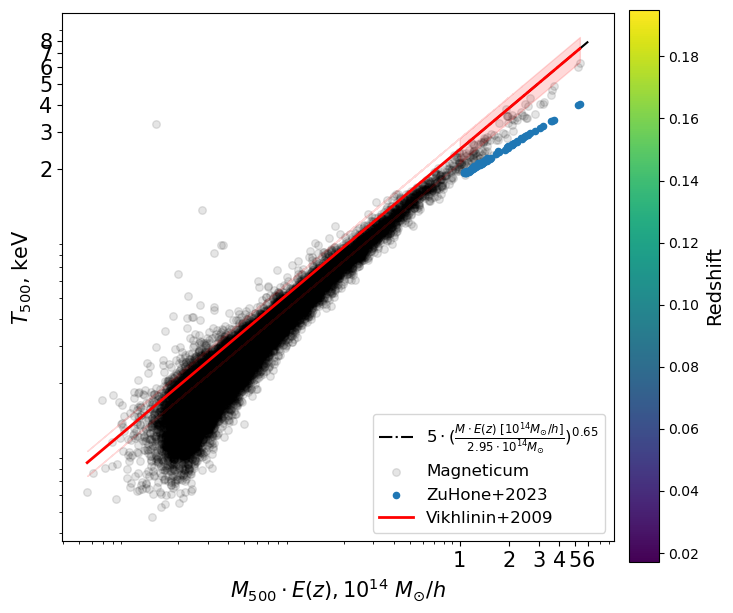

In [16]:
%run -i 'utils/functions.py'

def T_X(MM500):

    # in keV if M500 in M_sol/h
    
    ts = 5 * (MM500/ (2.95*10**14/0.704))**(0.65) # * E(zz[i])**(0.65) 
    yy = 5 * (MM500/ (2.95*10**14      ))**(0.65) # * E(zz[i])**(0.65) 

    return ts, yy

h=0.704

M500s = clusters["M500"].values
R500s = clusters["R500"].values
T500s = clusters["T500"].values
L500s = clusters["Lx500"].values
zs = clusters["z_true"].values

#print(M500s)
#L500s_05_20 = np.zeros(len(M500s))
#for i in range(len(M500s)):
#    L500s_05_20[i] = L_X_from_T(T500s[i], 0.1, zs[i], L500s[i])

R500s_rel = R500(M500s, zs)

T500s_rel = T_X(M500s*E(zs))[1]
#L500s_rel = L_X(M500s, zs, 0.704)

plt.figure(figsize=(6, 6))

#plt.subplot(131, aspect='auto')
#draw_panel(M500s, R500s, R500s_rel)
#plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
#plt.ylabel("$R_{500} \ / \ (1+z), kpc/h$", fontsize=14)
#plt.xticks([g*10**14 for g in [1, 2, 3, 4]], [1, 2, 3, 4])
#plt.yticks([g*100 for g in [6,7,8,9,10,11,12]], [6,7,8,9,10,11,12])

plt.subplot(111, aspect='auto')

#draw_panel(M500s*E(zs), T500s, T500s_rel)

#T500s_rel2 = T_X(M500s, zs, mean_T=3.18, mean_M=1.6)
#plt.plot(M500s*E(zs), T500s_rel2, color='dodgerblue', linewidth=0, marker='o', markersize=4, 
#         alpha=0.4, linestyle='--', label = 'sc.rel. w/ different <M> and <T>')
#plt.legend()

TX = [6.81, 3.99, 3.43, 4.12, 6.33, 8.73, 6.45, 8.22, 7.96, 6.14, 4.88,
      10.04, 8.37, 2.61, 3.83, 8.63, 7.72, 3.03, 3.64, 5.72, 3.57, 4.61]
MT = [6.61, 2.92, 2.32, 3.07, 6.74, 11.05, 6.03, 8.66, 8.20, 5.58, 4.54,
      11.70, 10.33, 1.52, 3.15, 10.82, 7.88, 1.91, 2.51, 5.80, 2.46, 4.16]
zw = [0.0386, 0.0304, 0.0346, 0.0328, 0.0557, 0.0542, 0.0557, 0.0779, 0.0881, 0.0622, 0.0469,
      0.0904, 0.0581, 0.0288, 0.0355, 0.0602, 0.0743, 0.0345, 0.0549, 0.0445, 0.0342, 0.0475]
LX = [2.37, 1.27, 1.60, 1.23, 3.14, 2.78, 2.91, 5.72, 7.24, 3.52, 1.96,
      7.20, 2.66, 6.18, 9.40, 2.69, 3.90, 7.47, 1.93, 1.06, 5.98, 1.14]

#plt.scatter(np.array(MT)*E(np.array(zw))*0.704*10**14, TX, color='k', label="Vikhlinin et al. (2009), Table 2", marker='x')

#plt.plot(   np.array(MT)*E(np.array(zw))*0.704*10**14, T_X(np.array(MT)*E(np.array(zw))*0.704*10**14), 
#            color='k', label='$5 \cdot (\\frac{M \cdot E(z)}{2.95 \cdot 10^{14} M_{\odot}/ h})^{0.65}$')

#plt.plot(   [1e14, 8e14], [T_X(1e14)[0], T_X(8e14)[0]], 
#            color='k', label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot}/ h})^{0.65}$')
plt.plot(   [1e14, 6e14], [T_X(1e14)[1], T_X(6e14)[1]], 
            color='k', 
            label='$5 \cdot (\\frac{M \cdot E(z) \ [10^{14} M_{\odot}/h]}{2.95 \cdot 10^{14} M_{\odot} \ \ })^{0.65}$',
            ls = '-.')

fix = np.append([1e14], M500s*E(zs))

#plt.scatter(M500s*E(zs), T500s, c=zs, cmap='viridis', s=30, label = 'Magneticum')
plt.scatter(M500s*E(zs), T500s, c='k', cmap='viridis', s=30, label = 'Magneticum', alpha=0.1)

#plt.scatter(MASSES_E, yyyy1, c=zs, cmap='viridis', s=20, label = '$T_{spec}$')

T_ZH = 1.40*2.29*(np.array(MASSES)/3/10**14)**0.47 #* (E(zs)/E(0.15))**0.84

plt.scatter(MASSES_E, T_ZH, s=20, label='ZuHone+2023')

plt.plot(M500s*E(zs), T500s_rel, color='red', linewidth=2, marker='.', markersize=0, 
         alpha=1, linestyle='-', label = 'Vikhlinin+2009')

plt.fill_between(fix, 
                 5 * (fix/(2.95)/10**14)**(0.65)*(1+0.2*2/3) ,#* E(zs)**(0.65), 
                 5 * (fix/(2.95)/10**14)**(0.65)*(1-0.2*2/3) ,#* E(zs)**(0.65), 
                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")

plt.legend(fontsize=12, loc=4)
    
#plt.subplot(122, aspect='auto')
##draw_panel(M500s, L500s, L0520s_rel)
#draw_panel(M500s, L500s_05_20/E(zs), L500s_rel/E(zs))
#plt.xlabel("$M_{500}, 10^{14} \ M_{\odot}/h$", fontsize=14)
#plt.ylabel("$L_{500} \ / \ E(z), 10^{44}$ erg/s", fontsize=14)
#plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5]], [1, 2, 3, 4, 5])
#plt.yticks([0.1, 1., 10], [0.1,1, 10])
#plt.ylim(0.09, 11)

#plt.fill_between(M500s, 
#                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*0.52, 
#                 1.056 * 0.704**(-2) * (M500s/3.9/10**14)**1.61 * E(zs)**(-0.15)*1.48, 
#                 interpolate=False, alpha=0.15, color='red')#, label="$1 \sigma$ errors")
#plt.legend()

#plt.subplots_adjust(right=0.96)
plt.tight_layout()

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500} \cdot E(z), 10^{14} \ M_{\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5, 6]], [1, 2, 3, 4, 5, 6], size=15)
plt.yticks([2,3,4,5,6,7,8], [2,3,4,5,6,7,8], size=15)

normzs = matplotlib.colors.Normalize(vmin=min(zs), vmax=max(zs), clip=True)
mapperzs = cm.ScalarMappable(norm=normzs, cmap='viridis')
#zs_colour = np.array([(mapperzs.to_rgba(v)) for v in zs])
plt.colorbar(mappable=mapperzs, cax = plt.axes([1.0, 0.06, 0.05, 0.92])).set_label('Redshift', fontsize=14)

#plt.savefig('sc-rel.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [8]:
NNNN = 50

#table_name = '0_ab-fix_cstat_10ks_standard-'+str(NNNN)
table_name =  '0_clean_50_new_new'

read_table = pd.read_csv('tables/table_'+table_name+'.csv', header=None, index_col=0, delimiter=' ').to_dict()
    
temp_usr =  list(zip(read_table[1].values(), read_table[2].values(), read_table[3].values()))
lumin_usr = list(zip(read_table[4].values(), read_table[5].values(), read_table[6].values()))
aven_usr =  list(zip(read_table[7].values(), read_table[8].values()))

yyyy1 = [a[1] for a in temp_usr]
yyyy1_err = [a[2] for a in temp_usr]

# Update from Ilaria

In [7]:
from astropy.table import Table

So, the data comes from the lightcone 30x30, thus you have 5 different snapshots (first column). 

Then, the ID of the galaxy is in the second column (grnr), which represents the position in the SubFind subhalo catalogue. 

After, you find logM500 [Msun], R500 [Mpc], and the temperatures [keV]. 

I give you the three estimates of the temperature: Spectroscopic (following Mazzotta+), mass-weighted (this is the one I used in the end) and the SubFind value last.

In [8]:
tt = Table.read("../data/LC30_Box2_hrbao_4Ildar.fits", hdu=1)

h=0.704
tt["M500"] = 10**tt["logM500"]
tt["M500*h"] = 10**tt["logM500"]*h
tt = tt[tt["M500"]*h > 10**14]

z1 = []

for snsh in tt["snapshot"]:
    if snsh == 124:
        z1.append(0.174192889973847)
    elif snsh == 128:
        z1.append(0.13708140389145)
    elif snsh == 132:
        z1.append(0.101142861718869)
    elif snsh == 136:
        z1.append(0.0663401914452304)
    elif snsh == 140:
        z1.append(0.032637492755919)

#print(z1)

tt["zslice"] = z1
#msk = tt["Tspec500"] == tt["Tspec500"].min()
#tt = tt[~msk]
#msk = tt["Tspec500"] == tt["Tspec500"].max()
#tt = tt[~msk]
display(tt)
tt["Tspec500"].min(), tt["Tspec500"].max()

snapshot,grnr,logM500,R500,Tspec500,Tmw500,Tsf500,M500,M500*h,zslice
int64,int64,float64,float64,float64,float64,float64,float64,float64,float64
140,323,14.257036,0.848316,1.833995,2.711676,2.616614,180732393441918.56,127235604983110.66,0.032637492755919
140,83,14.378421,0.931187,1.375165,3.013195,2.845682,239012712158323.7,168264949359459.88,0.032637492755919
132,218,14.288963,0.852145,1.328058,2.584787,2.428267,194519435246886.3,136941682413807.95,0.101142861718869
124,5,14.837383,1.268899,3.198378,6.066183,6.006272,687674626118529.4,484122936787444.6,0.174192889973847
132,113,14.302816,0.861238,1.493236,2.737546,2.585493,200824178918283.38,141380221958471.5,0.101142861718869
132,19,14.505632,1.00632,2.405186,3.853661,3.716541,320355363871205.2,225530176165328.44,0.101142861718869
124,6,14.846159,1.27744,3.71619,6.458029,6.317675,701712155957944.6,494005357794393.0,0.174192889973847
124,26,14.689342,1.132609,2.689136,5.150866,4.928839,489037316861194.06,344282271070280.6,0.174192889973847
132,12,14.55841,1.047897,2.078844,4.388202,4.292704,361751216297900.94,254672856273722.25,0.101142861718869


(0.227782, 5.765711)

In [9]:
tt.sort(['M500'])
tt.show_in_notebook()

idx,snapshot,grnr,logM500,R500,Tspec500,Tmw500,Tsf500,M500,M500*h,zslice
0,124,52,14.154686,0.751383,0.84626,2.321346,2.101684,142786122481787.44,100521430227178.34,0.174192889973847
1,124,325,14.157334,0.752906,0.994524,2.413251,2.216857,143659384039326.2,101136206363685.62,0.174192889973847
2,132,197,14.160074,0.771886,1.792227,2.272302,2.169498,144568608208708.7,101776300178930.9,0.101142861718869
3,128,440,14.162072,0.76457,1.244724,2.014092,1.884892,145235237750512.8,102245607376361.02,0.13708140389145
4,132,243,14.168715,0.777013,1.695168,2.39172,2.320665,147473843809888.7,103821586042161.62,0.101142861718869
5,124,335,14.171356,0.761043,1.478954,2.537538,2.457819,148373383352397.47,104454861880087.81,0.174192889973847
6,124,130,14.173607,0.762355,1.341909,2.374822,2.287483,149144416714041.16,104997669366684.97,0.174192889973847
7,128,271,14.174469,0.771879,5.765711,2.228018,2.163525,149440736755532.38,105206278675894.78,0.13708140389145
8,136,349,14.175914,0.78946,1.151687,2.547758,2.395391,149938789383649.25,105556907726089.06,0.0663401914452304
9,124,302,14.180143,0.766204,1.750402,2.201054,2.053303,151405970030446.44,106589802901434.28,0.174192889973847


In [10]:
clusters_filtered = clusters[clusters['ihal'].isin(tt['grnr'])]
clusters_filtered = clusters_filtered[~(clusters_filtered.index==3155)]
print(len(clusters_filtered))
clusters_filtered #[clusters_filtered["ihal"]==170]

77


,ihal,x_pix,y_pix,z_pix,Rrel,Mvir,z_true,z_obs,M500,R500,Mstar500,Mgas500,T500,Lx500,Ysz500,M200,R200,flag
7996,52,0.701214,0.864952,0.889731,0.004550,2.202970e+14,0.190263,0.189216,1.005210e+14,621.117,3.705870e+12,8.710240e+12,2.10168,0.452289,0.000002,1.539950e+14,971.786,0
1838,325,0.515507,0.942247,0.197297,0.004156,1.678390e+14,0.164107,0.164652,1.011360e+14,622.376,3.063870e+12,7.834560e+12,2.21686,0.362044,0.000002,1.447890e+14,952.021,0
15138,197,0.844231,0.344865,0.130662,0.007679,2.369120e+14,0.089352,0.089028,1.017760e+14,598.370,2.722430e+12,9.687380e+12,2.16950,0.420183,0.000002,1.901940e+14,1000.300,0
9636,440,0.052106,0.731626,0.114272,0.004940,1.466080e+14,0.124305,0.123266,1.022460e+14,612.042,2.397400e+12,9.998630e+12,1.88489,0.691902,0.000002,1.309260e+14,902.006,0
16666,243,0.119109,0.861178,0.613586,0.007301,2.036360e+14,0.106413,0.104950,1.038220e+14,602.344,2.728240e+12,1.056430e+13,2.32066,0.574152,0.000003,1.659020e+14,955.775,0
6001,335,0.541685,0.516097,0.661021,0.004080,1.588200e+14,0.181587,0.180465,1.044550e+14,629.103,3.088000e+12,9.186480e+12,2.45782,0.674680,0.000003,1.375240e+14,935.803,0
8930,130,0.515599,0.804422,0.996967,0.004482,2.106110e+14,0.194345,0.193937,1.049980e+14,630.187,3.454830e+12,9.908290e+12,2.28748,0.573800,0.000003,1.614220e+14,987.133,0
14559,271,0.748497,0.452910,0.992172,0.005125,1.636930e+14,0.156425,0.157270,1.052060e+14,617.893,4.226760e+12,1.031790e+13,2.16353,17.932400,0.000002,1.429120e+14,928.774,0
19523,349,0.373303,0.943536,0.987909,0.010375,1.783400e+14,0.084342,0.084015,1.055570e+14,592.650,3.313370e+12,6.942770e+12,2.39539,0.231120,0.000002,1.464050e+14,897.005,0
2386,302,0.970273,0.667754,0.250463,0.004196,1.728330e+14,0.166103,0.168291,1.065900e+14,633.369,2.932740e+12,1.018390e+13,2.05330,0.613800,0.000002,1.516250e+14,966.755,0


In [11]:
print(clusters_filtered["ihal"].values)
print(tt["grnr"].data)

[ 52 325 197 440 243 335 130 271 349 302 138 145 109 205 163 270 170 241
  58 144 217 289 231 198 260 113  83 192 187 141 222 132 179 146 323 199
 161 134 247 111 125  81  46 110 218 135 113 120 118  84  83  59  96  73
  68  61  57  77  78  62  39  57  40  79  19   5  51  17  12  40  28  18
   3  20  26   5   6]
[ 52 325 197 440 243 335 130 271 349 302 138 145 109 205 163 270 170 241
  58 144 217 289 231 198 260 113  83 192 187 141 222 132 179 146 323 199
 161 134 247 111 125  81  46 110 218 135 113 120 118  84  83  59  96  73
  68  61  57  77  78  62  39  57  40  79  19   5  51  17  12  40  28  18
   3  20  26   5   6]


In [12]:
%run -i 'utils/functions.py'

M_500 = 10**(tt["logM500"]-14) # M_sun
R_500 = tt["R500"]*1000 # kpc
Tspec500 = tt["Tspec500"] # keV
Tmw500 = tt["Tmw500"]
Tsf500 = tt["Tsf500"]

h=0.704
z_slice = tt["zslice"]

<Figure size 640x480 with 0 Axes>

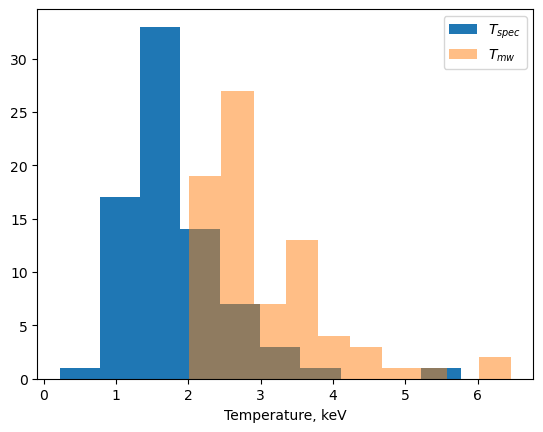

In [13]:
plt.hist(Tspec500, label='$T_{spec}$')
plt.hist(Tmw500, label='$T_{mw}$', alpha=0.5)
plt.xlabel("Temperature, keV")
plt.legend()
plt.show()

In [14]:
zw = [0.0386, 0.0304, 0.0346, 0.0328, 0.0557, 0.0542, 0.0557, 0.0779, 0.0881, 0.0622, 0.0469,
      0.0904, 0.0581, 0.0288, 0.0355, 0.0602, 0.0743, 0.0345, 0.0549, 0.0445, 0.0342, 0.0475]
np.mean(zw)

0.051818181818181826

<Figure size 640x480 with 0 Axes>

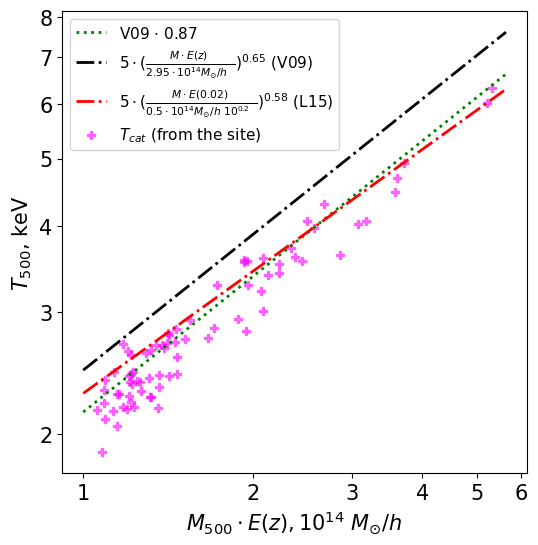

In [50]:
%run -i 'utils/functions.py'

def T_X(mass):

    # in keV if M500 in M_sol/h
    
    ts = 5 * (mass / (2.95*10**14/0.704))**(0.65) # * E(zz[i])**(0.65) 
    yy = 5 * (mass / (2.95*10**14      ))**(0.65) # * E(zz[i])**(0.65) 

    return ts, yy

def Tlov(mass):

    C1, C2 = 0.5*10**14, 2
    a, b = 1.71, 0.20
    
    return C2 * ( mass / C1 / 10**b)**(1/a)

plt.figure(figsize=(6, 6))

fix = np.array([1e14, 8e14*0.704])
Ta, Tb = T_X(fix[0]), T_X(fix[1])

plt.plot(   fix, [Ta[1]*0.87, Tb[1]*0.87], 
            color='g', 
            label='V09 $\\cdot \\ 0.87$',
            ls = ':', lw=2)
plt.plot(   fix, [Ta[1], Tb[1]], 
            color='k', 
            label='$5 \\cdot (\\frac{M \\cdot E(z) \\ }{2.95 \\cdot 10^{14} M_{\\odot}/h \\ \\ })^{0.65}$ (V09)',
            ls = '-.', lw=2)
plt.plot(   fix, Tlov(fix), 
            color='r', 
            label='$5 \\cdot (\\frac{M \\cdot E(0.02) \\ }{0.5 \\cdot 10^{14} M_{\\odot}/h \\ 10^{0.2} \\ \\ })^{0.58}$ (L15)',
            ls = '-.', lw=2)
#plt.fill_between(fix, 
#                 5 * (fix/(2.95)/10**14)**(0.65)*(1+0.2*2/3) ,#* E(zs)**(0.65), 
#                 5 * (fix/(2.95)/10**14)**(0.65)*(1-0.2*2/3) ,#* E(zs)**(0.65), 
#                 interpolate=False, alpha=0.15, color='green')#, label="$1 \sigma$ errors")

#plt.scatter(M_500*10**14, Tspec500, color='red', s=20, label = '$T_{spec}$ (Magneticum)')
#plt.scatter(M_500*10**14*E(tt["zslice"])*0.704, Tmw500, color='b', s=30, label = '$T_{mw}$', alpha=0.5, marker='X')
#plt.scatter(M_500*10**14, Tsf500, c='r', s=20, marker='P', label = '$T_{SubFind}$ ')
plt.scatter(clusters_filtered["M500"]*E(clusters_filtered["z_true"]), clusters_filtered["T500"], color='magenta', s=30, label = '$T_{cat}$ (from the site)', alpha=0.5, marker='P')

#plt.scatter(M_500*10**14*E(tt["zslice"]), T_X(M_500*10**14*E(tt["zslice"]))[0], c='magenta')

#plt.axvline(2.95*10**14, ls='--', ymin=0, ymax=1, c='k')
#plt.axhline(5, ls=':', xmax=1, c='k')

plt.legend(fontsize=11, loc=2)

plt.xscale("log")
plt.yscale("log")
plt.xlabel("$M_{500} \\cdot E(z), 10^{14} \\ M_{\\odot}/h$", fontsize=15)
plt.ylabel("$T_{500}$, keV", fontsize=15)
plt.xticks([g*10**14 for g in [1, 2, 3, 4, 5, 6]], [1, 2, 3, 4, 5, 6], size=15)
plt.yticks([2,3,4,5,6,7,8], [2,3,4,5,6,7,8], size=15)

#plt.axvline(10**14/0.704, c='k', ls=':')

#normzs = matplotlib.colors.Normalize(vmin=min(zs), vmax=max(zs), clip=True)
#mapperzs = cm.ScalarMappable(norm=normzs, cmap='hot')
#zs_colour = np.array([(mapperzs.to_rgba(v)) for v in zs])
#plt.colorbar(mappable=mapperzs, cax = plt.axes([.93, 0.06, 0.05, 0.82])).set_label('Redshift', fontsize=14)

plt.savefig('sc-rel-3.pdf', format='pdf', bbox_inches='tight')
plt.show()

In [16]:
from astropy.cosmology import FlatLambdaCDM

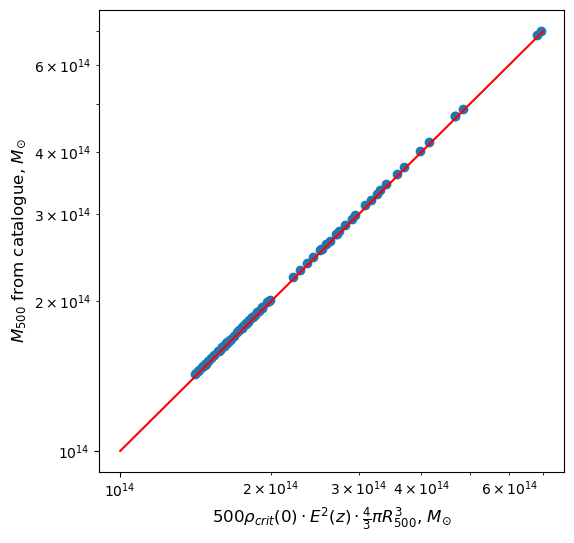

In [17]:
rho_0 = FlatLambdaCDM(H0=100*0.704, Om0=0.272).critical_density(0) # g/cm^3
rho_0 = rho_0.value / 2e33 * (3.08e21)**3
h = 0.704

r5 = tt["R500"]*1000
zs = tt["zslice"]
Es = np.sqrt(0.272*(1+zs)**3+0.728)

m5 = 4/3*np.pi * r5**3 * 500 * rho_0 * Es**2 # / (1+zs)**3

plt.figure(figsize=(6,6))

plt.plot([1e14, 7e14], [1e14, 7e14], color='r')

plt.scatter(m5, M_500*10**14)
plt.ylabel("$M_{500}$ from catalogue, $M_{\\odot}$", fontsize=12)
plt.xlabel("$500 \\rho_{crit}(0) \\cdot E^2(z) \\cdot \\frac{4}{3} \\pi R_{500}^3$, $M_{\\odot}$", fontsize=12)
plt.xscale("log")
plt.yscale("log")

#plt.xlim(1.5*10**14, 2*10**14)
#plt.ylim(1.5*10**14, 2*10**14)

#plt.savefig('M500-comparison.pdf', format='pdf', bbox_inches='tight')

plt.show()

In [133]:
clusters_filtered["T500"].values
Tspec500	Tmw500	Tsf500

array([2.10168, 2.21686, 2.1695 , 1.88489, 2.32066, 2.45782, 2.28748,
       2.16353, 2.39539, 2.0533 , 2.70055, 2.28304, 2.27204, 2.18816,
       2.43074, 2.60178, 2.17444, 2.44243, 2.37674, 2.63955, 2.18861,
       2.3604 , 2.3871 , 2.38334, 2.46142, 2.22808, 2.30589, 2.26585,
       2.40917, 2.64289, 2.69458, 2.18192, 2.43526, 2.68825, 2.61661,
       2.26553, 2.33671, 2.70821, 2.66629, 2.78095, 2.79883, 2.71829,
       2.83882, 2.44633, 2.42827, 2.74616, 2.58549, 2.91909, 2.75796,
       3.28834, 2.84568, 2.93296, 2.81526, 3.56059, 3.57076, 3.54822,
       3.27958, 3.21771, 3.59873, 3.01252, 3.39758, 3.41572, 3.51845,
       3.59917, 3.71654, 3.56035, 4.05757, 3.96912, 4.2927 , 3.6239 ,
       4.02647, 4.0651 , 4.4675 , 4.69222, 4.92884, 6.00627, 6.31768])

In [135]:
tt["Tmw500"].data

array([2.321346, 2.413251, 2.272302, 2.014092, 2.39172 , 2.537538,
       2.374822, 2.228018, 2.547758, 2.201054, 2.789367, 2.377219,
       2.384488, 2.297792, 2.58143 , 2.773905, 2.324927, 2.515867,
       2.502505, 2.77825 , 2.340051, 2.451899, 2.458788, 2.510942,
       2.57609 , 2.364275, 2.402567, 2.438313, 2.51001 , 2.785917,
       2.813664, 2.34202 , 2.547688, 2.806438, 2.711676, 2.42223 ,
       2.460796, 2.832709, 2.786988, 2.852572, 2.888121, 2.845863,
       2.90377 , 2.584181, 2.584787, 2.864659, 2.737546, 3.007528,
       2.914038, 3.391021, 3.013195, 3.120245, 3.025163, 3.701556,
       3.698337, 3.635606, 3.403155, 3.387269, 3.69808 , 3.201218,
       3.629237, 3.55224 , 3.631036, 3.791219, 3.853661, 3.690145,
       4.134174, 4.107769, 4.388202, 3.784183, 4.176458, 4.24879 ,
       4.589649, 4.881249, 5.150866, 6.066183, 6.458029], dtype='>f8')

In [141]:
tt["zslice"].data

array([0.17419289, 0.17419289, 0.10114286, 0.1370814 , 0.10114286,
       0.17419289, 0.17419289, 0.1370814 , 0.06634019, 0.17419289,
       0.17419289, 0.1370814 , 0.17419289, 0.10114286, 0.17419289,
       0.1370814 , 0.10114286, 0.1370814 , 0.1370814 , 0.10114286,
       0.1370814 , 0.10114286, 0.1370814 , 0.17419289, 0.10114286,
       0.06634019, 0.10114286, 0.17419289, 0.1370814 , 0.1370814 ,
       0.17419289, 0.17419289, 0.17419289, 0.17419289, 0.03263749,
       0.06634019, 0.1370814 , 0.17419289, 0.1370814 , 0.17419289,
       0.1370814 , 0.17419289, 0.1370814 , 0.17419289, 0.10114286,
       0.17419289, 0.10114286, 0.17419289, 0.1370814 , 0.1370814 ,
       0.03263749, 0.17419289, 0.17419289, 0.17419289, 0.17419289,
       0.10114286, 0.10114286, 0.17419289, 0.17419289, 0.1370814 ,
       0.1370814 , 0.17419289, 0.1370814 , 0.17419289, 0.10114286,
       0.10114286, 0.1370814 , 0.1370814 , 0.10114286, 0.17419289,
       0.17419289, 0.17419289, 0.17419289, 0.17419289, 0.17419

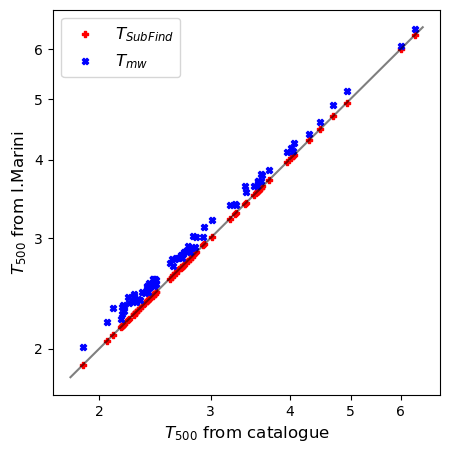

In [163]:
plt.figure(figsize=(5,5))
plt.plot([1.8, 6.5], [1.8, 6.5], c='k', alpha=0.5)
plt.scatter(clusters_filtered["T500"].values, tt["Tsf500"].data, s=20, color='red', marker='P', label='$T_{SubFind}$')
plt.scatter(clusters_filtered["T500"].values, tt["Tmw500"].data, s=20, color='blue', marker='X', label='$T_{mw}$')
plt.xlabel("$T_{500}$ from catalogue", fontsize=12)
plt.ylabel("$T_{500}$ from I.Marini", fontsize=12)
plt.xscale("log")
plt.yscale("log")
plt.xticks([2,3,4,5,6], [2,3,4,5,6])
plt.yticks([2,3,4,5,6], [2,3,4,5,6])
plt.legend(fontsize=12)
plt.show()

<Figure size 640x480 with 0 Axes>

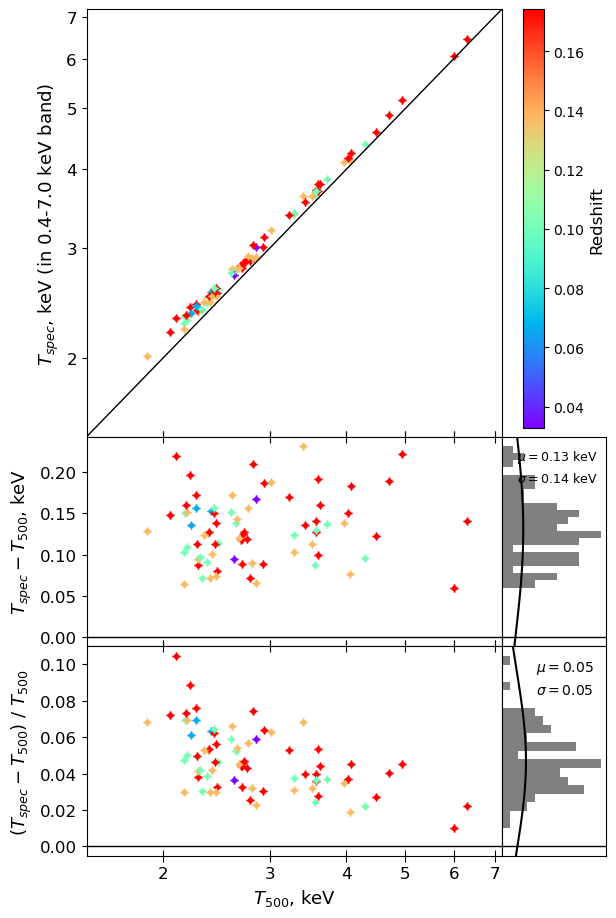

In [164]:
%run -i 'utils/scripts.py'
%run -i 'utils/draw.py'

t500_catalogue = list(zip(np.zeros(77), clusters_filtered["T500"].values, np.zeros(77)))
t500_illaria = list(zip(np.zeros(77), tt["Tmw500"].data, np.zeros(77)))

draw_three_panels_vertical(x_array=t500_catalogue,
                  y_array=t500_illaria,
                  x_label="$T_{500}$, keV",
                  y_label_left="$T_{spec}$, keV (in 0.4-7.0 keV band)",
                  y_label_right_up="$T_{spec} - T_{500}$, keV",
                  y_label_right_down="$(T_{spec} - T_{500}) \\ / \\ T_{500}$",
                  clr='grey',
                  NnNn=50,
                  cmap=list(tt["zslice"].data),
                  cmap_label="Redshift")

#plt.savefig('figures/T_vs_T500_vertical.pdf', format='pdf', bbox_inches='tight')
plt.show()